## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
import csv

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the data table for preview


In [2]:
#preview data before merge
mouse_metadata.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [3]:
#preview data before merge
study_results.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [4]:
#additional preview before merge
study_results.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [5]:
#additional preview before merge
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [6]:
# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata,study_results,on='Mouse ID')

In [7]:
# Checking the number of mice.
mouse_study_results['Mouse ID'].value_counts()

g989    13
i334    10
r554    10
g296    10
e227    10
        ..
n482     1
h428     1
x336     1
v199     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
#sort values by Mouse ID
mouse_study_results.sort_values(by=['Mouse ID'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_duplicates = mouse_study_results.duplicated(keep=False)
print(mouse_study_duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool


In [10]:
duplicate_values_table = mouse_study_results[mouse_study_duplicates]
duplicate_values_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [11]:
#store ID for duplicated mouse
duplicated_mouse = 'g989'

In [12]:
# Optional: Get all the data for the duplicate mouse ID.
#view filtered dataframe on duplicate mouse
mouse_study_results[mouse_study_results['Mouse ID'] == duplicated_mouse]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study = mouse_study_results[mouse_study_results['Mouse ID'] != duplicated_mouse]
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
#checking the number of mice in the clean DataFrame.
mouse_study['Mouse ID'].value_counts()

c766    10
z581    10
k382    10
r554    10
g296    10
        ..
o848     1
f932     1
h428     1
l872     1
t573     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each
# regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mouse_study_descriptive = mouse_study.groupby("Drug Regimen").describe()
mouse_study_descriptive.head()


Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  

[5 rows x 40 columns]

In [16]:
#calculate var
mouse_study_var = mouse_study.groupby("Drug Regimen").var()
mouse_study_var.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,59.620372,7.466034,206.928043,24.947764,0.720790
Ceftamin,65.147591,2.501016,204.031772,39.290177,1.402527
Infubinol,56.404272,4.769028,181.534470,43.128684,1.054942
Ketapril,36.236432,3.392536,196.839089,68.553577,1.942883
Naftisol,45.102703,2.247748,201.208951,66.173479,1.479919


In [17]:
#calculate sem
mouse_study_sem = mouse_study.groupby("Drug Regimen").sem()
mouse_study_sem.head()

,Age_months,Metastatic Sites,Mouse ID,Sex,Timepoint,Tumor Volume (mm3),Weight (g)
Drug Regimen,,,,,,,
Capomulin,0.509136,0.055981,NaN,NaN,0.948518,0.329346,0.180169
Ceftamin,0.604977,0.088766,NaN,NaN,1.070629,0.469821,0.118535
Infubinol,0.562919,0.076985,NaN,NaN,1.009879,0.492236,0.163684
Ketapril,0.439030,0.101659,NaN,NaN,1.023238,0.603860,0.134333
Naftisol,0.492430,0.089200,NaN,NaN,1.040081,0.596466,0.109930


In [18]:
#combine sem and var
merge1 = pd.merge(mouse_study_var,mouse_study_sem,on='Drug Regimen',suffixes=('_var','_sem'))
merge1

,Age_months_var,Weight (g)_var,Timepoint_var,Tumor Volume (mm3)_var,Metastatic Sites_var,Age_months_sem,Metastatic Sites_sem,Mouse ID,Sex,Timepoint_sem,Tumor Volume (mm3)_sem,Weight (g)_sem
Drug Regimen,,,,,,,,,,,,
Capomulin,59.620372,7.466034,206.928043,24.947764,0.720790,0.509136,0.055981,NaN,NaN,0.948518,0.329346,0.180169
Ceftamin,65.147591,2.501016,204.031772,39.290177,1.402527,0.604977,0.088766,NaN,NaN,1.070629,0.469821,0.118535
Infubinol,56.404272,4.769028,181.534470,43.128684,1.054942,0.562919,0.076985,NaN,NaN,1.009879,0.492236,0.163684
Ketapril,36.236432,3.392536,196.839089,68.553577,1.942883,0.439030,0.101659,NaN,NaN,1.023238,0.603860,0.134333
Naftisol,45.102703,2.247748,201.208951,66.173479,1.479919,0.492430,0.089200,NaN,NaN,1.040081,0.596466,0.109930
Placebo,40.384837,3.378146,192.954266,61.168083,1.792449,0.472356,0.099514,NaN,NaN,1.032495,0.581331,0.136615
Propriva,48.251655,2.933995,187.050699,43.852013,1.224306,0.570986,0.090952,NaN,NaN,1.124214,0.544332,0.140799
Ramicane,35.362393,10.465318,203.796178,23.486704,0.477838,0.393825,0.045780,NaN,NaN,0.945433,0.320955,0.214244
Stelasyn,63.036648,2.701473,191.620626,59.450562,0.944874,0.590143,0.072252,NaN,NaN,1.028921,0.573111,0.122169


In [19]:
# Assemble the resulting series into a single summary dataframe.
combined_drug_summary = mouse_study_descriptive.join(merge1,on='Drug Regimen')
combined_drug_summary.head()

C:\Users\eddie\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(Age_months, count)","(Age_months, mean)","(Age_months, std)","(Age_months, min)","(Age_months, 25%)","(Age_months, 50%)","(Age_months, 75%)","(Age_months, max)","(Weight (g), count)","(Weight (g), mean)",...,Timepoint_var,Tumor Volume (mm3)_var,Metastatic Sites_var,Age_months_sem,Metastatic Sites_sem,Mouse ID,Sex,Timepoint_sem,Tumor Volume (mm3)_sem,Weight (g)_sem
Drug Regimen,,,,,,,,,,,,,,,,,,,,,
Capomulin,230.0,13.456522,7.721423,1.0,7.00,16.5,20.0,24.0,230.0,19.965217,...,206.928043,24.947764,0.720790,0.509136,0.055981,NaN,NaN,0.948518,0.329346,0.180169
Ceftamin,178.0,13.247191,8.071406,2.0,6.00,12.0,20.0,24.0,178.0,27.398876,...,204.031772,39.290177,1.402527,0.604977,0.088766,NaN,NaN,1.070629,0.469821,0.118535
Infubinol,178.0,16.230337,7.510278,1.0,8.00,20.0,23.0,24.0,178.0,27.196629,...,181.534470,43.128684,1.054942,0.562919,0.076985,NaN,NaN,1.009879,0.492236,0.163684
Ketapril,188.0,15.659574,6.019670,1.0,11.75,18.0,19.0,24.0,188.0,27.861702,...,196.839089,68.553577,1.942883,0.439030,0.101659,NaN,NaN,1.023238,0.603860,0.134333
Naftisol,186.0,12.000000,6.715855,2.0,8.00,9.0,19.0,23.0,186.0,27.166667,...,201.208951,66.173479,1.479919,0.492430,0.089200,NaN,NaN,1.040081,0.596466,0.109930


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each
# regimen

# Using the aggregation method, produce the same summary statistics in a single line

mouse_study_final_stats = mouse_study.groupby('Drug Regimen').aggregate(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
mouse_study_final_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# prep data

#filter to needed columns
mouse_study_drug_reg = mouse_study[["Mouse ID","Drug Regimen"]]

#set index to Mouse ID
mouse_study_drug_reg = mouse_study_drug_reg.set_index("Drug Regimen")

mouse_study_drug_reg_groupby = mouse_study_drug_reg.groupby("Drug Regimen").count()

mouse_study_drug_reg_groupby.head()

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


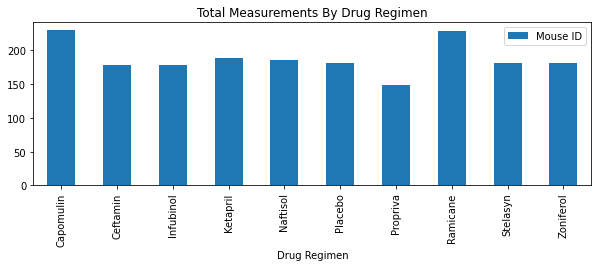

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# build and show bar plot

pd_barplot = mouse_study_drug_reg_groupby.plot(kind="bar",figsize=(10,3),title="Total Measurements By Drug Regimen")



In [94]:
#reset index
mouse_study_drug = mouse_study_drug_reg_groupby.reset_index()
mouse_study_drug

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


<BarContainer object of 10 artists>

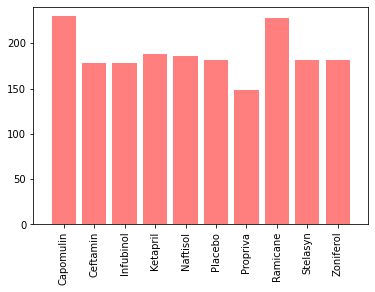

In [181]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
xaxis = mouse_study_drug['Drug Regimen'].to_numpy()
yaxis = mouse_study_drug['Mouse ID'].to_numpy()
pyplot_bar = plt.bar(xaxis,yaxis,color='r',width=0.8,alpha=0.5)
plt.xlim(-1, 10)
plt.ylim(0, max(y)+10)
plt.xticks(np.arange(len(x)),x,rotation="vertical")
pyplot_bar

In [168]:
#recall mouse table and create dataframe with unique values
mouse_study_sex = mouse_study.drop_duplicates(subset=['Mouse ID', 'Sex'], keep='last')
mouse_sex_groupby = mouse_study_sex.groupby('Sex').count()
mouse_sex_pie = mouse_sex_groupby[["Mouse ID"]]
mouse_sex_pie.head()
#mouse_sex_groupby.head()

,Mouse ID
Sex,
Female,123
Male,125


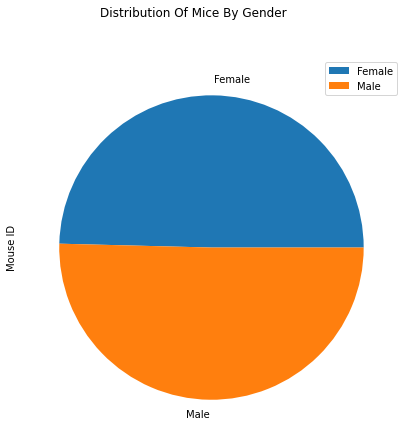

In [177]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pd_pieplot = mouse_sex_pie.plot(kind="pie",figsize=(20,7),subplots=True,
                               title="Distribution Of Mice By Gender")


In [178]:
#reset index
mouse_sex_matplotpie = mouse_sex_pie.reset_index()
mouse_sex_matplotpie

,Sex,Mouse ID
0,Female,123
1,Male,125


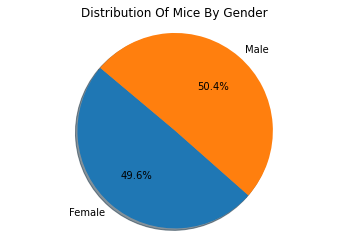

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

xaxis = mouse_sex_matplotpie['Sex']
yaxis = mouse_sex_matplotpie['Mouse ID'].to_numpy()
pyplot_pie = plt.pie(yaxis,autopct="%1.1f%%",labels=xaxis, shadow=True, startangle=140)
plt.title("Distribution Of Mice By Gender")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
